Mean Absolute Error (MAE): 79.58
R² Score: 0.91


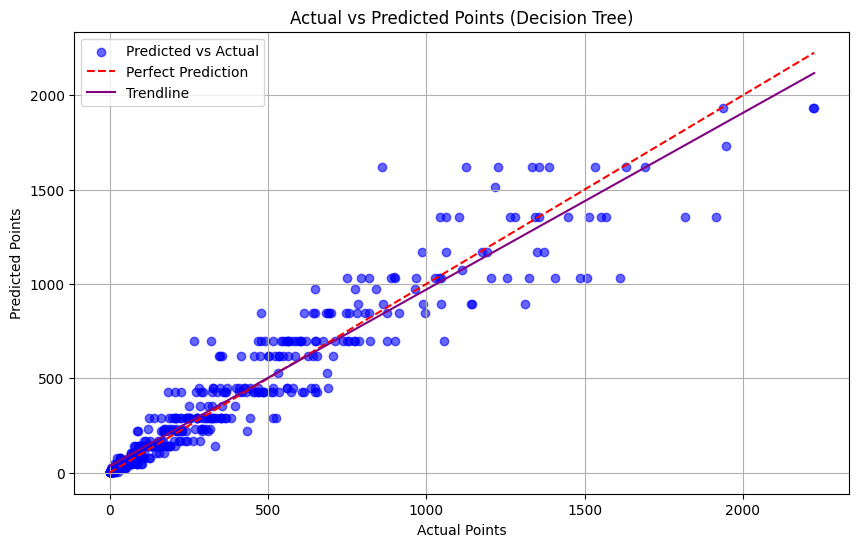

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

file_path = 'all_nba_playerstats_2021-2025.csv'
player_stats_df = pd.read_csv(file_path)

target_column = 'PTS'
feature_columns = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']

X = player_stats_df[feature_columns]
y = player_stats_df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='purple', label='Trendline')

plt.title('Actual vs Predicted Points (Decision Tree)')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.legend()
plt.grid(True)
plt.show()


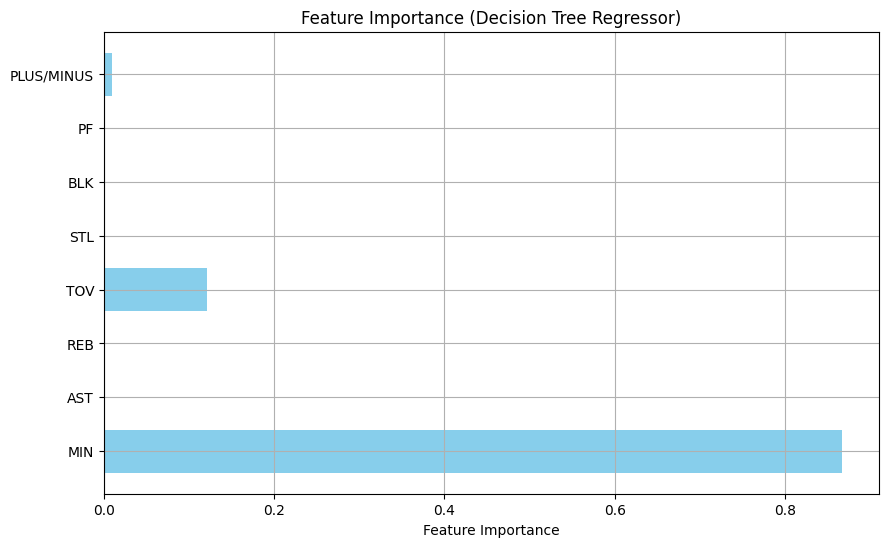

In [70]:
feature_importances = model.feature_importances_

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Decision Tree Regressor)')
plt.grid(True)
plt.show()

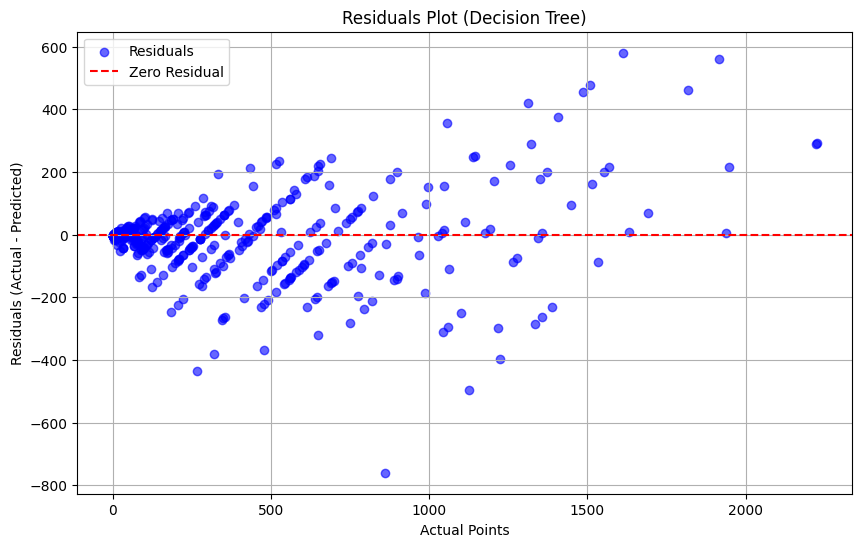

In [71]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual')
plt.title('Residuals Plot (Decision Tree)')
plt.xlabel('Actual Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.grid(True)
plt.show()


In [72]:
import statsmodels.api as sm

X = player_stats_df[feature_columns]
y = player_stats_df[target_column]

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()


print(results.summary())

p_values = results.pvalues[1:]  
for feature, p_value in zip(feature_columns, p_values):
    print(f"Feature: {feature}, P-value: {p_value}")


                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     3928.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        00:03:05   Log-Likelihood:                -13709.
No. Observations:                2218   AIC:                         2.744e+04
Df Residuals:                    2209   BIC:                         2.749e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4815      3.869     -5.035      0.0

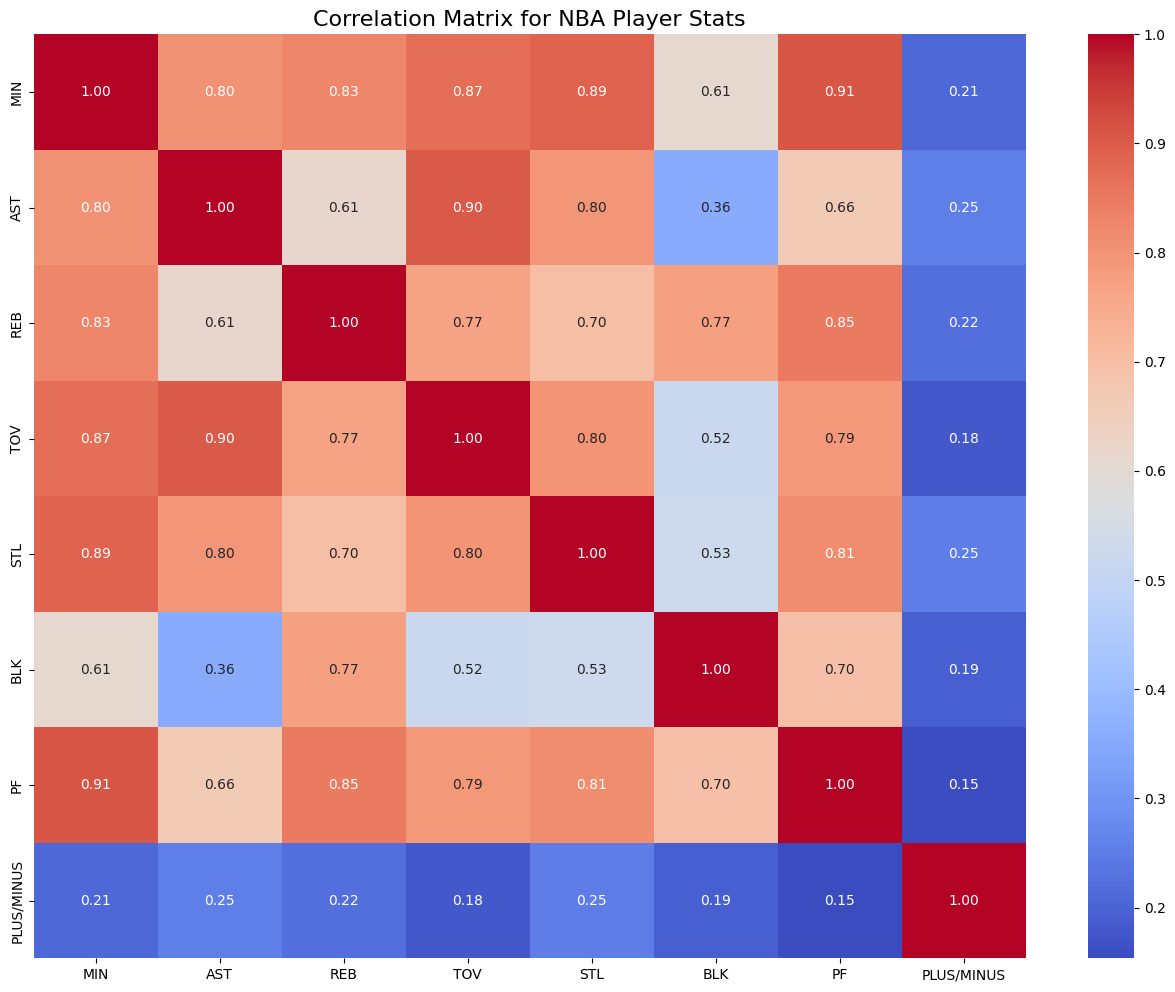

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

file_path = 'all_nba_playerstats_2021-2025.csv'
player_stats_df = pd.read_csv(file_path)

features = ['MIN', 'AST', 'REB', 'TOV', 'STL', 'BLK', 'PF', 'PLUS/MINUS']

player_stats_df = player_stats_df.dropna(subset=features)

correlation_matrix = player_stats_df[features].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for NBA Player Stats", fontsize=16)
plt.show()
